# Filtros digitales diseño

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import freqz

In [ ]:
fc = 100 #frecuencia de corte
Fs = 1000 #frecuencia de muestreo
N = 2 # orden del filtro
rp = 1 # factor de rizo del filtro
Wn = fc/(Fs/2) # Frecuencia de corte de acuerdo a la mitad de la frecuencia de muestreo


### Diseño del filtro

In [ ]:
num, den = signal.cheby1(N, rp,  Wn, btype='lowpass', analog=False, output='ba')
w,h = freqz(num, den,worN=512, fs = Fs)

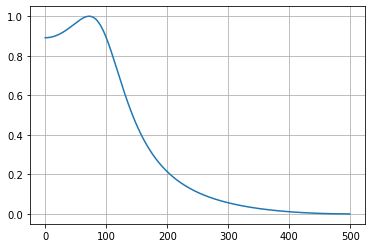

In [ ]:
plt.plot(w, np.abs(h))
#plt.ylim(-10,1)
plt.grid(True)

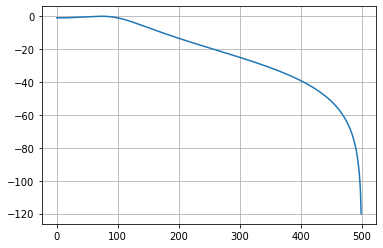

In [ ]:
plt.plot(w, 20*np.log10(abs(h)))
#plt.ylim(-10,1)
plt.grid(True)

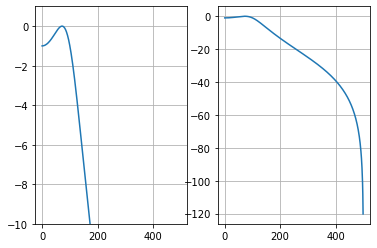

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0].plot(w, 20*np.log10(abs(h)))
axes[0].set_ylim(-10,1)
axes[0].grid('on')

axes[1].plot(w, 20*np.log10(abs(h)))
#axes[1].set_ylim(-10,1)
axes[1].grid('on')

In [ ]:
num, den

(array([0.07042246, 0.14084492, 0.07042246]),
 array([ 1.        , -1.19967757,  0.51573876]))

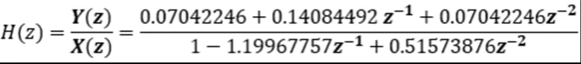

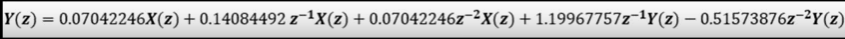

### Filtro en ecuaciones en diferencia

In [ ]:
!pip install tqdm

In [ ]:
!pip install ipympl

In [ ]:
from tqdm import tqdm

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[]

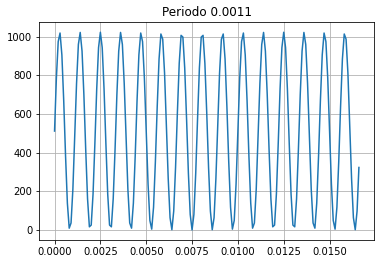

In [ ]:
%matplotlib widget

#frecuencia de corte es 100hz
F = 900
T = 1/F

Fs = Fs #10*F
Ts = 1/Fs

ciclos = 15
Tmax = ciclos*T

bits=10
A=2**bits

#t = np.arange(0, ciclos*T, Ts)
t = np.arange(0, Tmax, Ts)
#t = np.arange(0,45, Ts)
#signal_in = np.sin(2*np.pi*F*t)
signal_in = (A/2)*np.sin(2*np.pi*F*(t)) + A/2

plt.plot(t,signal_in)
plt.title("Periodo %.4f"%T)
plt.grid('on')
plt.plot()

In [ ]:
len(signal_in)

167

In [ ]:
# entrada de la señal
signal_in = signal_in#np.array([])
signal_out = np.array([])
t = t #np.arange(0, len(signal_in), 1/Fs)

x_1=0
x_2=0
y_1=0
y_2=0

y_ajust = 0

for i in tqdm(range(len(signal_in))):
    x = signal_in[i]
    y = 0.07042246*x + 0.14084492*x_1 + 0.07042246*x_2 + 1.19967757*y_1 - 0.51573876*y_2
    #print(y)
    x_2 = x_1
    x_1 = x
    y_2 = y_1
    y_1 = y
    #"""
    if (y>1023):
        y_ajust = 1023
    elif y<0:
        y_ajust=0
    else:
        y_ajust = y
    #"""
    #signal_out = np.append(signal_out, y)
    signal_out = np.append(signal_out, int(y_ajust))





100%|██████████| 167/167 [00:00<00:00, 28810.82it/s]


In [ ]:
print(len(signal_out))
#print(signal_out)

167


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

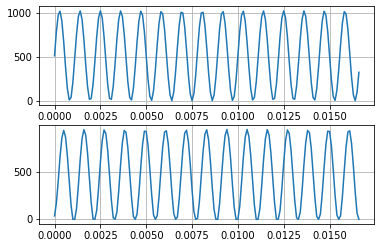

In [ ]:
%matplotlib widget

fig,axes = plt.subplots(2)

axes[0].plot(t, signal_in)
axes[0].grid(True)

#axes[1].plot(t, signal_out)
axes[1].plot(t, signal_out)
axes[1].grid(True)